In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

In [ ]:
cancer = load_breast_cancer()
rng = np.random.default_rng(seed=42)

# noiseを作る
noise = rng.normal(size=(len(cancer.data), 50))

# noiseを付け足す
# hstackは新しい列を作る, pd.concat(axis=1)と同じ
X_w_noise = np.hstack([cancer["data"], noise])


X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer["target"], random_state=0, test_size=0.5)

select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)

X_train_selected = select.transform(X_train)

print(X_train.shape)
print(X_train_selected.shape)


(284, 80)
(284, 40)


Text(0.5, 0, 'Sample index')

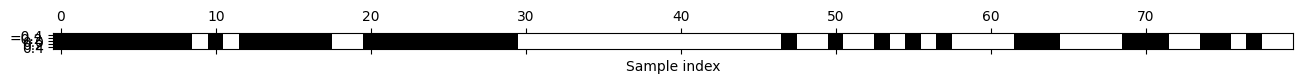

In [12]:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap="gray_r")
plt.xlabel("Sample index")

In [13]:
from sklearn.linear_model import LogisticRegression

In [22]:
X_test_selected = select.transform(X_test)

logreg = LogisticRegression(max_iter=4000)

logreg.fit(X_train, y_train)
print(logreg.score(X_test, y_test))


logreg = LogisticRegression(max_iter=4000)

logreg.fit(X_train_selected, y_train)
print(logreg.score(X_test_selected, y_test))

0.9333333333333333
0.9438596491228071
